In [3]:
!pip install wget

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.metrics import confusion_matrix,f1_score

In [2]:
#downloading poems
!python -m wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/edgar_allan_poe.txt
!python -m wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt

In [2]:
#text files
files=['edgar_allan_poe.txt','robert_frost.txt']

In [3]:
# saving each line and labels in a list
texts = []
labels = []

for label, f in enumerate(files):
  print(f"{f} corresponds to label {label}")

  for line in open(f):
    line = line.rstrip().lower()
    if line:
      line = line.translate(str.maketrans('', '', string.punctuation))

      texts.append(line)
      labels.append(label)

edgar_allan_poe.txt corresponds to label 0
robert_frost.txt corresponds to label 1


In [4]:
# %head edgar_allan_poe.txt

In [5]:
texts

['lo death hath reard himself a throne',
 'in a strange city all alone',
 'far down within the dim west',
 'where the good and the bad and the worst and the best',
 'have gone to their eternal rest',
 'â€‰',
 'there shrines and palaces and towers',
 'are not like any thing of ours',
 'oh no o no ours never loom',
 'to heaven with that ungodly gloom',
 'timeeaten towers that tremble not',
 'resemble nothing that is ours',
 'around by lifting winds forgot',
 'resignedly beneath the sky',
 'the melancholy waters lie',
 'â€‰',
 'no holy rays from heaven come down',
 'on the long nighttime of that town',
 'but light from out the lurid sea',
 'streams up the turrets silently',
 'up thrones up longforgotten bowers',
 'of sculturd ivy and stone flowers',
 'up domes up spires up kingly halls',
 'up fanes up babylonlike walls',
 'up many a melancholy shrine',
 'whose entablatures intertwine',
 'the mask the viol and the vine',
 'â€‰',
 'there open temples open graves',
 'are on a level with the 

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(texts,labels)

In [7]:
#lenght of text
len(y_train),len(y_test),len(X_test),len(X_train)

(1618, 540, 540, 1618)

In [8]:
X_train[:7]

['some say the world will end in fire',
 'i idled down',
 'in youth i have known one with whom the earth',
 'among unearthed potatoes standing still',
 'and wont tell',
 'son we think they had a grave down in the cellar',
 'that israfelis fire']

In [9]:
X_train[5]

'son we think they had a grave down in the cellar'

In [10]:
#converting text to integers
ind=1 #current index
word2ind={'unk': 0} #convert unknown token to zero

In [11]:
#spliting the text into tokens
for i in X_train:
    tokens=i.split()  #spliting text to token
     #checking if token is in dict
    for tok in tokens:
        if tok not in word2ind:
            word2ind[tok]=ind
            ind += 1     
    

In [12]:
len(word2ind)

2511

In [13]:
word2ind

{'unk': 0,
 'some': 1,
 'say': 2,
 'the': 3,
 'world': 4,
 'will': 5,
 'end': 6,
 'in': 7,
 'fire': 8,
 'i': 9,
 'idled': 10,
 'down': 11,
 'youth': 12,
 'have': 13,
 'known': 14,
 'one': 15,
 'with': 16,
 'whom': 17,
 'earth': 18,
 'among': 19,
 'unearthed': 20,
 'potatoes': 21,
 'standing': 22,
 'still': 23,
 'and': 24,
 'wont': 25,
 'tell': 26,
 'son': 27,
 'we': 28,
 'think': 29,
 'they': 30,
 'had': 31,
 'a': 32,
 'grave': 33,
 'cellar': 34,
 'that': 35,
 'israfelis': 36,
 'to': 37,
 'see': 38,
 'if': 39,
 'town': 40,
 'wanted': 41,
 'take': 42,
 'over': 43,
 'then': 44,
 'same': 45,
 'smarty': 46,
 'someone': 47,
 'said': 48,
 'look': 49,
 'was': 50,
 'hot': 51,
 'enough': 52,
 'for': 53,
 'first': 54,
 'of': 55,
 'may': 56,
 'theyll': 57,
 'find': 58,
 'theyve': 59,
 'got': 60,
 'whole': 61,
 'thing': 62,
 'do': 63,
 'old': 64,
 'man': 65,
 'seriously': 66,
 'took': 67,
 'his': 68,
 'bearings': 69,
 'as': 70,
 'towers': 71,
 'thrown': 72,
 'aside': 73,
 'were': 74,
 'mans': 75,


In [14]:
#coverting tokens to integers for train data
int_train=[] 
for te in X_train:
    tokens=te.split()
    line=[word2ind[token] for token in tokens]
    int_train.append(line)


In [15]:
int_train

[[1, 2, 3, 4, 5, 6, 7, 8],
 [9, 10, 11],
 [7, 12, 9, 13, 14, 15, 16, 17, 3, 18],
 [19, 20, 21, 22, 23],
 [24, 25, 26],
 [27, 28, 29, 30, 31, 32, 33, 11, 7, 3, 34],
 [35, 36, 8],
 [37, 38, 39, 3, 40, 41, 37, 42, 43],
 [44, 35, 45, 46, 47, 48, 37, 49],
 [50, 51, 52, 53, 3, 54, 55, 56],
 [57, 58, 59, 60, 3, 61, 62, 37, 63, 43],
 [3, 64, 65, 66, 67, 68, 69],
 [70, 39, 3, 71, 31, 72, 73],
 [30, 74, 32, 75, 68, 76, 77, 53, 78],
 [7, 32, 79, 80, 81, 82],
 [83, 84, 85, 9, 86, 87, 32, 88, 89],
 [3, 90, 91, 92],
 [15, 93, 94, 3, 6, 55, 95, 96],
 [97, 3, 98, 99],
 [100, 101, 37, 26, 102, 103, 30, 25, 104],
 [55, 105, 106, 107, 108, 31, 109, 110, 111],
 [112, 113, 35, 114, 3, 115, 55, 81, 116],
 [55, 81, 117, 118, 119, 120, 121],
 [53, 122, 65, 123, 124, 125],
 [24, 126, 53, 3, 127],
 [3, 128, 129, 3, 130, 131, 132, 3, 15],
 [24, 133, 134, 13, 135, 136, 137],
 [83, 138, 139, 140, 141, 142, 143, 110, 3, 144],
 [145, 146, 147, 114, 148, 149, 150, 50],
 [151, 152, 153, 154, 32, 155],
 [156, 157, 158,

In [16]:
#coverting tokens to integers for test data
int_test=[]
for te in X_test:
    tokens=te.split()
    lines=[word2ind.get(token,0) for token in tokens]
    int_test.append(lines)

In [17]:
int_test[55:65]

[[3, 0, 3, 0, 24, 3, 0],
 [87, 48, 1537, 135, 3, 1671, 0, 0],
 [141, 44, 105, 1918, 1597, 9, 0],
 [114, 293, 7, 347, 83, 1194, 332, 1023, 92],
 [24, 0],
 [806, 114, 3, 211, 71, 55, 3, 40],
 [24, 478, 158, 55, 81, 354, 0],
 [294, 310, 15, 1710, 2295],
 [324, 0, 32, 1573, 204, 2168],
 [83, 616, 616, 78, 7, 3, 1334, 651]]

In [18]:
#Building A and pi matrices for the markov models
var=len(word2ind)
A0=np.ones((var,var))# because add one smothing will be used
pi0=np.ones(var)

A1=np.ones((var,var))
pi1=np.ones(var)

In [19]:
# compute counts for A and pi
def compute_counts(text_as_int, A, pi):
  for tokens in text_as_int:
    last_idx = None
    for idx in tokens:
      if last_idx is None:
        # it's the first word in a sentence
        pi[idx] += 1
      else:
        # the last word exists, so count a transition
        A[last_idx, idx] += 1

      # update last idx
      last_idx = idx

In [20]:
#computing the counts which takes three arguments
def compute(int_text,A,pi):
    for tokens in int_text: #each element is a poem
        last_ind=None
        for ind in tokens:
            if last_ind is None: # if the last index is none then it shows its the beginning of a sentence
                pi +=1
                A[last_ind,ind] += 1
            else:
                A[last_ind,ind] += 1
                last_ind=ind
#call the function and filter train test in list
compute([i for i, y in zip(int_train,y_train) if y==0],A0,pi0)
compute([i for i, y in zip(int_train,y_train) if y==1],A1,pi1)              

In [21]:
#divide A by its row of sums for normalizing the peobability matrices
A0 /= A0.sum(axis=1,keepdims=True)
pi0 /= pi0.sum()

A1 /= A1.sum(axis=1,keepdims=True)
pi1 /= pi1.sum()


In [22]:
logA0=np.log(A0)
logA1=np.log(A1)
logpi0=np.log(pi0)
logpi1=np.log(pi1)

In [23]:
#computing the pries
count_0 =sum(y==0 for y in y_train) #those that belong to class 0
count_1 =sum(y==1 for y in y_train) #those that belong to class 1
total=len(y_train)
#calculating prior probabilities
p0=count_0/total
p1=count_1/total
print(p0)
print(p1)

0.3368355995055624
0.6631644004944376


In [52]:
logp0=np.log(p0)
logp1=np.log(p1)
print(logp0)
print(logp1)

-1.088160302955193
-0.4107323549877385


# Building classifiers

In [68]:
# build a classifier
class Classifier:
    def __init__(self, logAs, logpis, logps):
        self.logAs = logAs
        self.logpis = logpis
        self.logps = logps
        self.K = len(logps) # number of classes
    def _compute_log_likelihood(self, input_, class_):
        logA = self.logAs[class_]
        logpi = self.logpis[class_]

        last_idx = None
        logprob = 0
        for idx in input_:
            if last_idx is None:
            # it's the first token
                logprob += logpi[idx]
            else:
                logprob += logA[last_idx, idx]

              # update last_idx
            last_idx = idx

        return logprob

    def predict(self, inputs):
        predictions = np.zeros(len(inputs))
        for i, input_ in enumerate(inputs):
            posteriors = [self._compute_log_likelihood(input_, c) + self.logps[c] \
                          for c in range(self.K)]
            pred = np.argmax(posteriors)
            predictions[i] = pred
        return predictions       

        

In [69]:
clf = Classifier([logA0, logA1], [logpi0, logpi1], [logp0, logp1])

In [72]:
#predict train
pred_train=clf.predict(int_train)
acc=np.mean(pred_train ==y_train)
print(acc)

0.6631644004944376


In [73]:
#predict test
pred_test=clf.predict(int_test)
acct=np.mean(pred_test ==y_test)
print(acct)

0.6722222222222223


In [76]:
#checking for imbalanced classes train
cm=confusion_matrix(y_train,pred_train)
cm

array([[   0,  545],
       [   0, 1073]], dtype=int64)

<AxesSubplot:>

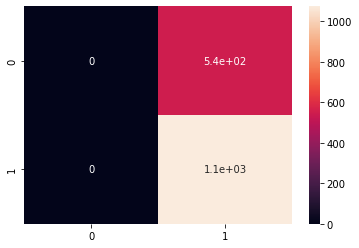

In [79]:
import seaborn as sns
sns.heatmap(cm,annot=True)

Heat map shows that there is an imbalanced class

In [80]:
#checking for imbalanced classes 
cm=confusion_matrix(y_test,pred_test)
f
cm

array([[  0, 177],
       [  0, 363]], dtype=int64)

<AxesSubplot:>

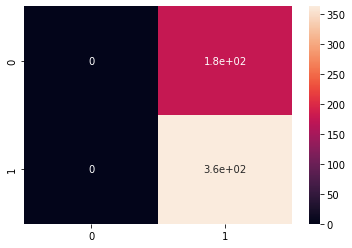

In [81]:
sns.heatmap(cm,annot=True)

In [82]:
f1_score(y_train,pred_train)

0.7974730583426235

In [83]:
f1_score(y_test,pred_test)

0.8039867109634552